# Brownian Motion

## Introduction

In this post we will talk about the [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion) (also called **Wiener Process**), probably one of the most famous and most important stochastic processes. We will start from the **random walk**, a very simple stochastic process and show how the Brownian motion is actually a form of random walk, just a continous version of it.

We will also show some simulations and introduce a formal definition of the Brownian motion at the end of this post. We will be dealing with one-dimensional random walk and, consequently, one-dimensional Brownian motion, but it is to be kept in mind that this can also be extended to $n$ dimensions.

## Random Walk

Let us imagine a human that is standing on the number line at the point zero at the beginning. Now we allow that human to move either by one step to the right ($+1$), or one step to the left ($-1$) at any step. For example if our human was standing at the point zero at the beginning ($n=0$), then in the next step ($n=1$) he can be either at the point $1$ or $-1$. Then in the next step ($n=2$), if in the first step he was standing at the number $1$, he can either go to number $2$ or back to $0$, where he was at the beginning. Equivalently, if he was standing at $-1$ in the first step ($n=1$), in the next step he can either be at $-2$ or back to $0$.

Let us denote the position of our human at the step $n$ with $x_n$. We know that he was standing at zero at the beginning, so $x_0 = 0$. Then $x_1$ can either be $+1$ of $-1$, and so on. 

Now let's imagine a simple trajectory that this human could create and we will plot it in python. For example, let's imagine that he was moving in each step as shown in the table below: 

|n|0|1|2|3|4|5|6|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|**step**|-|1|1|-1|-1|-1|1|
|$x_n$|0|1|2|1|0|-1|0|


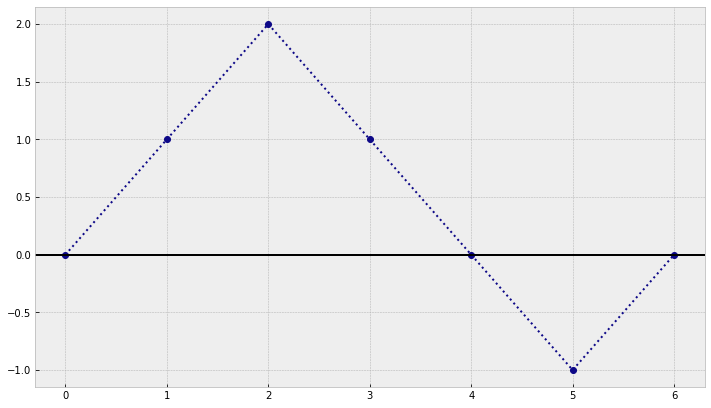

In [1]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
cmap = plt.get_cmap('plasma')

x0 = 0
steps = [1,1,-1,-1,-1,1]
times = range(len(steps) + 1)

trajectory = [x0]
for t in range(len(steps)):
    trajectory.append(trajectory[-1] + steps[t])
    

plt.figure(figsize=(12,7))
plt.plot(times, trajectory, c=cmap(0), linestyle='dotted', marker='o')
plt.axhline(y=0, color='k')
plt.show()

As you can see, in our example after 6 steps our human ended up again at the same position where it started. Now we will try to see what happend when we make our steps smaller and smaller :)

## Smaller and smaller steps

Let us restrict the time during which our human will be making steps and let us denote it as an interval $I=[0,T]$, where $T=1$. For example we can decide that our human will do $10$ steps, that means that, starting at zero, after every $0.1$ our human will make a step either by $+1$ or by $-1$. We will denote with $N$ the number of steps our human will do in our interval. If we say set that our human moves up or down with equal probability of $0.5$ then with the code below we will plot some random trajectories for values of $N=\{10,100,1000\}$.

Before that we define a function that draws a trajectory for a given final time $T$, the number of steps $N$, some starting point $x_0$ and some size of the step, which is $1$ by default:

In [2]:
import numpy as np
import random

def random_walk_trajectory(T, N, x0, step_size=1):
    ts = np.linspace(0, T, N+1) # N+1 stands only because numpy includes both boundaries 0 and T in the array
    trajectory = [x0]

    for i in range(N):
        coin_flip = random.random() # generate a random number in interval [0,1]
        if coin_flip < 0.5:
            trajectory.append(trajectory[-1] - step_size)
        else:
            trajectory.append(trajectory[-1] + step_size)

    return ts, trajectory

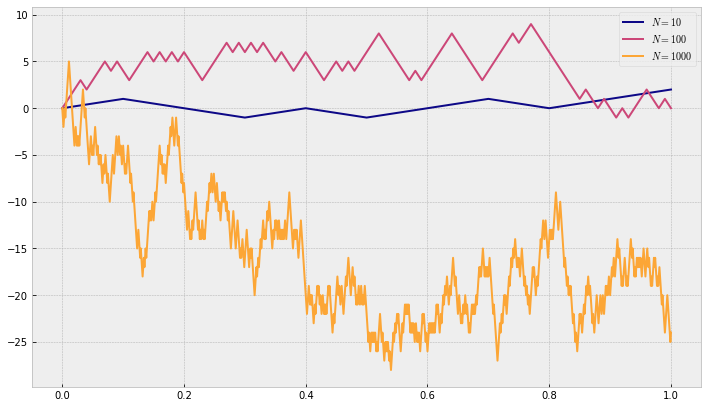

In [3]:
random.seed(26)

times1, trajectory1 = random_walk_trajectory(T=1, N=10, x0=0)
times2, trajectory2 = random_walk_trajectory(T=1, N=100, x0=0)
times3, trajectory3 = random_walk_trajectory(T=1, N=1000, x0=0)

plt.figure(figsize=(12,7))
plt.plot(times1, trajectory1, c=cmap(0), label='$N=10$')
plt.plot(times2, trajectory2, c=cmap(0.5), label='$N=100$')
plt.plot(times3, trajectory3, c=cmap(0.8), label='$N=1000$')

plt.legend()
plt.show()

One can immediately see that by leaving the step size equal to $1$, the more we split our interval, the more our process can move away from its starting point. We need to somehow restrict the movement such that it depends on the length of 1-step interval, which is $0.1$ in case $N=10$ and $0.01$ in case of $N=100$. If we denote with $h$ the size of the step our human can take, we will set 

$$h=\sqrt{\frac{T}{N}}=\sqrt{\Delta t}$$

Let us now try to draw the trajectories for the same values of $N$, but with restricted step size $h=\sqrt{\Delta t}$.

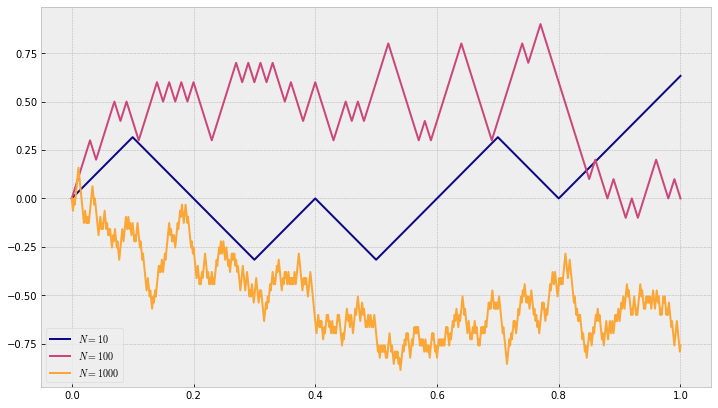

In [4]:
random.seed(26)

times1, trajectory1 = random_walk_trajectory(T=1, N=10, x0=0, step_size=np.sqrt(1/10))
times2, trajectory2 = random_walk_trajectory(T=1, N=100, x0=0, step_size=np.sqrt(1/100))
times3, trajectory3 = random_walk_trajectory(T=1, N=1000, x0=0, step_size=np.sqrt(1/1000))

plt.figure(figsize=(12,7))
plt.plot(times1, trajectory1, c=cmap(0), label='$N=10$')
plt.plot(times2, trajectory2, c=cmap(0.5), label='$N=100$')
plt.plot(times3, trajectory3, c=cmap(0.8), label='$N=1000$')

plt.legend(loc='lower left')
plt.show()

```{note}
Now, regardless of $N$, our process will be of the *same scale*. 
```

## Back to Brownian Motion

What we have built above is esentially something that leads us to the Brownian Motion if we let $N\rightarrow\infty$ and we restrict the step size to be $h=\sqrt{\Delta t}$. The higher value of $N$ we set, we get finer and finer granularity and we get closer and closer to Brownian motion. We can keep increasing $N$ to see what will happen, but we expect it to look more and more like a trajectory of a Brownian motion. We can see that for a few trajectories we generate when we split the interval $[0,T]$ into $10000$ parts.

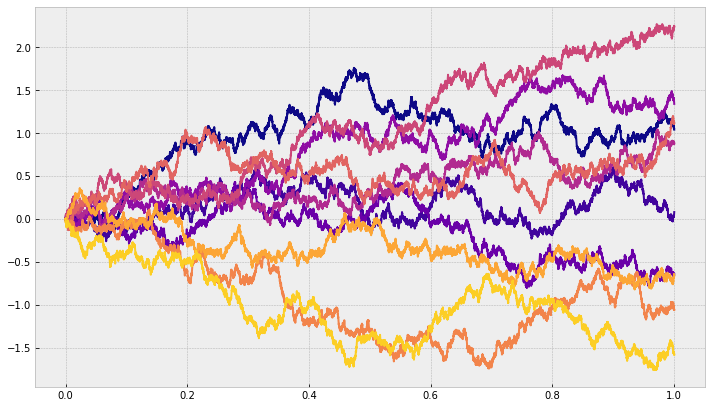

In [5]:
T = 1
N = 10_000
n_trajectories = 10

plt.figure(figsize=(12,7))

for i in range(n_trajectories):
    times, trajectory = random_walk_trajectory(T=T, N=N, x0=0, step_size=np.sqrt(T/N))
    plt.plot(times, trajectory, c=cmap(i/n_trajectories))

plt.show()

This is, however, still not the final product because we still only allow only one possible step size (which can be either positive or negative), and no matter in how many parts we split our interval it is always possible to split it more. For this reason we want to show mathematically what is happening as $N$ approaches infinity. 

## Mathematical point of view

If we take some $t>0$ and we split an interval $[0,t]$ into $n$ steps we can denote the position of our process (what we previously called *our human*) at time $t$ with 

$$X_t = X_n = Y_1 + Y_2 + \cdots + Y_n = \sum_{i=1}^n Y_i$$

The size of the $i$-th step is a random variable $Y_i$, and we decide that its distribution will be as follows:

$$Y_i \sim \left(\begin{array}{cc}
h & -h \\
0.5 & 0.5
\end{array}\right)$$

That is, at each step, it can go up by $h$ with probability $0.5$, or it can go down by $h$ with the same probability. 

```{important}
All steps $Y_i$ are $iid$ (independent and identically distributed). Since we have a sum of random variables that are *iid*, according to the **central limit theorem** we know that as $n\rightarrow\infty$ such sum is distributed normally: 

$$\sum_{i=1}^n Y_i \sim \mathcal{N}(0,n\cdot\sigma_Y^2)$$
```

Here we denote with $\sigma_Y^2$ the variance of $Y_i$: 

$$\sigma_Y^2 = Var(Y_i) = \mathbb{E}(Y_i^2) - (\mathbb{E}(Y_i))^2 = (0.5\cdot h^2 + 0.5\cdot h^2) - 0 = h^2$$

With this calculated we can plug it into the equation from above

$$X_n = \sum_{i=1}^n Y_i \sim \mathcal{N}(0,n\cdot h^2)$$

From here we can see that we are actually free to choose whatever step size $h$, as we have not made any restrictions on that. However, **Brownian motion** (Wiener Process) is a special case when the size of the jump $h$ is equal to the square root of the time increment $\Delta t$, i.e.

$$h=\sqrt{\Delta t}=\sqrt{\frac{t}{n}}$$

If we plug it in the expression from above we get

$$X_t = X_n \sim \mathcal{N}\left(0,n\cdot \sqrt{\frac{t}{n}}^2\right)$$

$$X_t \sim \mathcal{N}(0,t)$$

The interpretation of this is that we know what is the distribution of the value of the process $X$ at any time $t$. This is a very cool result and we can now simulate our Brownian motion very accurately.

## Formal definition of the Brownian Motion

A continuous time stochastic process $\mathbf{W} = (W_t)_{t\geq0}$ is called a standard *Brownian motion*, or *Wiener process*, if:

- $W_0 = 0$
- $\mathbf{W}$ has independen t increments, i.e. for all sequences $0<t_1<\cdots<t_n$, the random variables $W_{t_1},W_{t_2}-W_{t_1},...,W_{t_n}-W_{t_{n-1}}$ are independent
- $\mathbf{W}$ is continuous
- for all pairs $s<t$, the random variable $W_t - W_s$ has a Gaussian distribution with mean 0 and variance $t-s$, i.e.: 

$$W_t - W_s \sim \mathcal{N}(0,t-s)$$

## Simulations

Now that we have all the ingredients, and the formal definition of the Brownian motion, let us show how we can easily simulate it in Python and show its final distribution. We will start by defining a function 

In [6]:
def brownian_motion_trajectory(T, n=1000):
	ts = np.linspace(0,T,n)
	dt = T/(n-1)
	w = 0
	trajectory = [w]
	for _ in range(len(ts)-1):
		step = np.random.normal(loc=0, scale=np.sqrt(dt))
		trajectory.append(trajectory[-1] + step)
	return ts, trajectory

Now we will simulate $200$ trajectories of Brownian motions and see how they are distributed at time $T$. Of course, we expect to see a normal distribution.

In [7]:
random.seed(13)

T = 1
n = 1000
n_trajectories = 200

ts = np.linspace(0,T,n)

trajectories = []
for i in range(n_trajectories):
    _, ws = brownian_motion_trajectory(T=T, n=n)
    trajectories.append(ws)
    
trajectories.sort(key=lambda path: path[-1]) # we sort them in a decreasing order of the value at time T

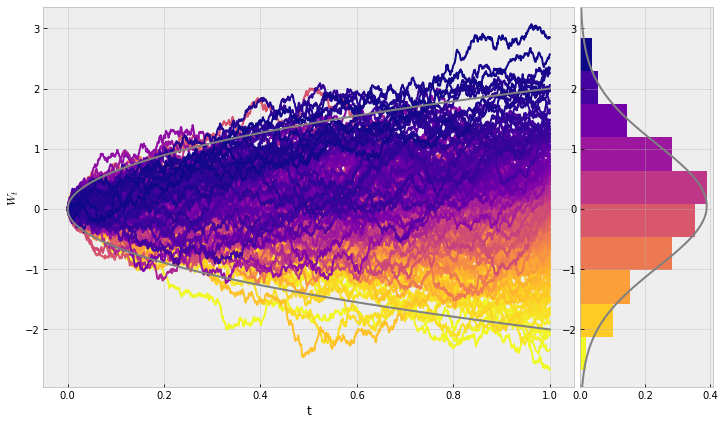

In [8]:
from scipy.stats import norm 

fig, axs = plt.subplots(1,2,figsize=(12,7), gridspec_kw={'width_ratios': [4,1]})

for i in range(len(trajectories)):
    axs[0].plot(ts, trajectories[i], color=cmap(1-i/len(trajectories)))

boundaries = 2*np.sqrt(ts) # 2 sigma

axs[0].plot(ts, boundaries, c='grey')
axs[0].plot(ts, -boundaries, c='grey')
axs[0].set_xlabel("t")
axs[0].set_ylabel("$W_t$")

ending_values = list(map(lambda traj: traj[-1], trajectories))
_, bins, patches = axs[1].hist(ending_values, orientation='horizontal', density=True)

axs[1].set_ylim(axs[0].get_ylim()) # setting equal limits on the y axis

colors = np.linspace(0,1,len(patches))
for i in range(len(patches)):
    patches[i].set_facecolor(cmap(1-colors[i]))

mu, std = norm.fit(ending_values)
xmin, xmax = axs[1].get_ylim()
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std)
  
axs[1].plot(p, x, 'grey', linewidth=2) 
plt.subplots_adjust(wspace=0.02)
plt.show()

## Next steps

Now that we have seen how Brownian motion can informally be derived and we have shown how to simulate it, now we can move on to other stochastic processes that build upon the Brownian motion. Then next one that will be discussed is the **Generalized Brownian motion**. 